In [2]:
using Revise # Keep track of changes in the project while we are working

using DistributedOptimization
using Plots

┌ Info: Recompiling stale cache file /home/javier/.julia/compiled/v1.2/DistributedOptimization/ytpFe.ji for DistributedOptimization [e71022db-cd80-4fd1-944d-aa95929a62a5]
└ @ Base loading.jl:1240


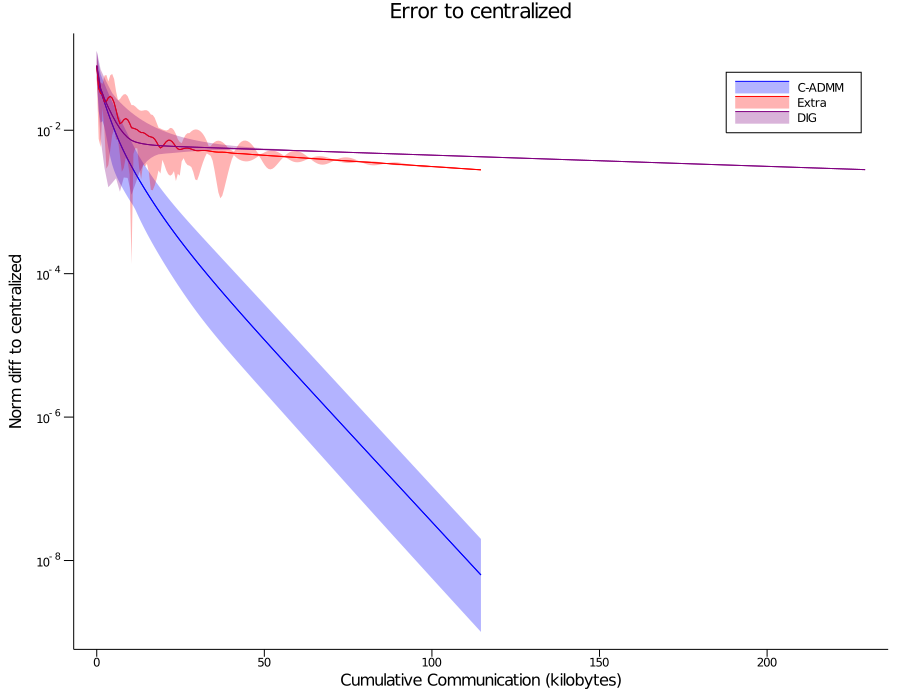

In [11]:
# Create the problem
# Initialization
N = 10
n = 2
K = 200 #Number of iterations

# Create a random problem
#comm_graph, tess = generate_random_delaunay_graph(N)
(comm_graph, pts) = generate_disk_graph(N)
prob = SeperableQuadratic(n, comm_graph)

# Solve the centralized problem
xcent = solve_centralized(prob)

# Generate initial node values
x_inits = solve_local(prob)

# Solve with different methods
fv, xhist_ad, chist_ad = cadmm(prob, x_inits; MAX_CYCLES=K, recordx=true)
fv, xhist_ex, chist_ex = extra(prob, x_inits; MAX_CYCLES=K, recordx=true)
fv, xhist_dig, chist_dig = dig(prob, x_inits; MAX_CYCLES=K, recordx=true)

error_ad = norm2_error(xhist_ad, xcent)
error_ex = norm2_error(xhist_ex, xcent)
error_dig = norm2_error(xhist_dig, xcent)

error_plt = plot(yaxis=(:log), grid=false, tick_direction=:out, size=(900, 700))

# Plot the output
plot_bounded_errors!(error_plt, error_ad, :blue, "C-ADMM"; chist=10.0^-3 .* chist_ad)
plot_bounded_errors!(error_plt, error_ex, :red, "Extra"; chist=10.0^-3 .* chist_ex)
plot_bounded_errors!(error_plt, error_dig, :purple, "DIG"; chist=10.0^-3 .* chist_dig)

title!(error_plt, "Error to centralized")
xaxis!(error_plt, "Cumulative Communication (kilobytes)")
yaxis!(error_plt, "Norm diff to centralized")

display(error_plt)

┌ Info: Saved animation to 
│   fn = /home/javier/.julia/dev/DistributedOptimization/results/tmp.gif
└ @ Plots /home/javier/.julia/packages/Plots/Xnzc7/src/animation.jl:104


Plots.AnimatedGif("/home/javier/.julia/dev/DistributedOptimization/results/tmp.gif")
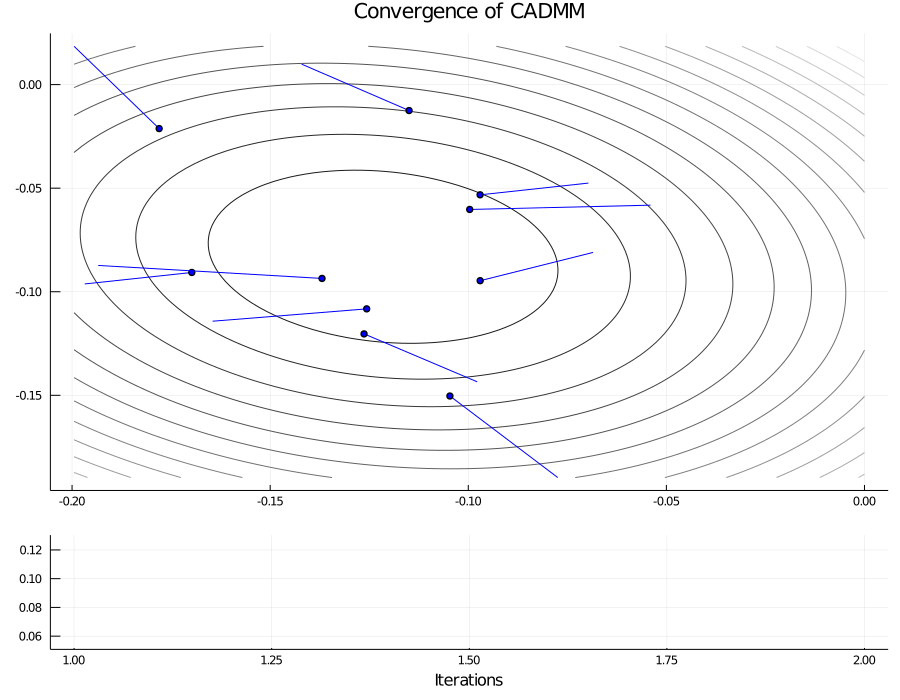

In [12]:
lims_ad = get_xhist_limits(xhist_ad)

@gif for t in 2:size(xhist_ad[1], 2)
    l = @layout [a{0.8h}; b{0.2h}]
    p = plot(layout=l, legend=false, size=(900, 700))
    
    plot_cost_contour!(p[1], prob, lims_ad, 100)
    plot_xhist!(p[1], xhist_ad, :blue; until=t)
    plot_bounded_errors!(p[2], error_ad, :blue, "CADMM"; until=t-1)
    xaxis!(p[2], "Iterations")
    title!(p[1], "Convergence of CADMM")
end

┌ Info: Saved animation to 
│   fn = /home/javier/.julia/dev/DistributedOptimization/results/tmp.gif
└ @ Plots /home/javier/.julia/packages/Plots/Xnzc7/src/animation.jl:104


Plots.AnimatedGif("/home/javier/.julia/dev/DistributedOptimization/results/tmp.gif")
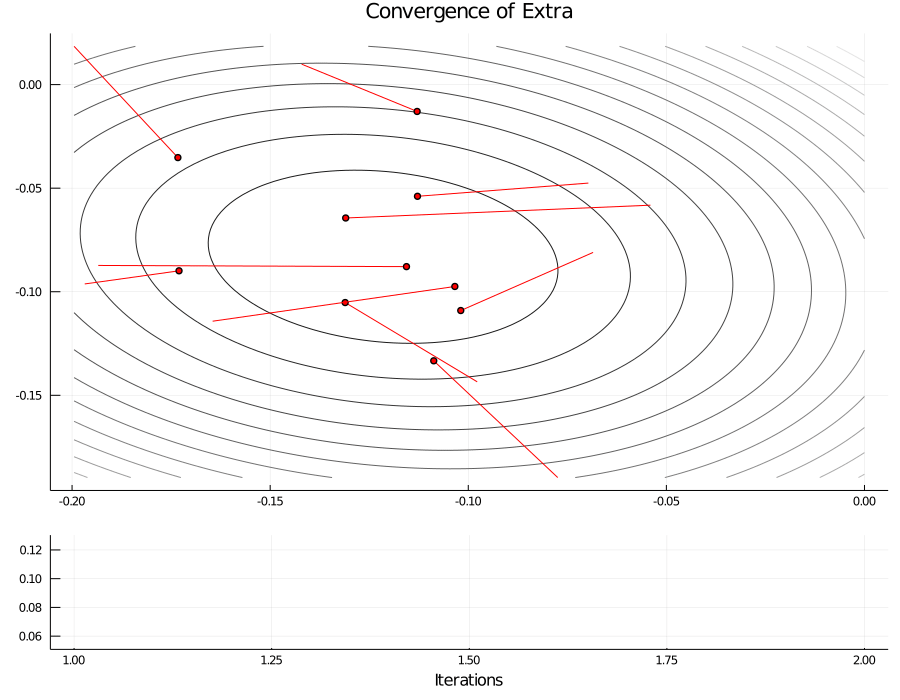

In [13]:
lims_ex = get_xhist_limits(xhist_ex)

@gif for t in 2:size(xhist_ex[1], 2)
    l = @layout [a{0.8h}; b{0.2h}]
    p = plot(layout=l, legend=false, size=(900, 700))
    
    plot_cost_contour!(p[1], prob, lims_ex, 100)
    plot_xhist!(p[1], xhist_ex, :red; until=t)
    plot_bounded_errors!(p[2], error_ex, :red, "Extra"; until=t-1)
    xaxis!(p[2], "Iterations")
    title!(p[1], "Convergence of Extra")
end

┌ Info: Saved animation to 
│   fn = /home/javier/.julia/dev/DistributedOptimization/results/tmp.gif
└ @ Plots /home/javier/.julia/packages/Plots/Xnzc7/src/animation.jl:104


Plots.AnimatedGif("/home/javier/.julia/dev/DistributedOptimization/results/tmp.gif")
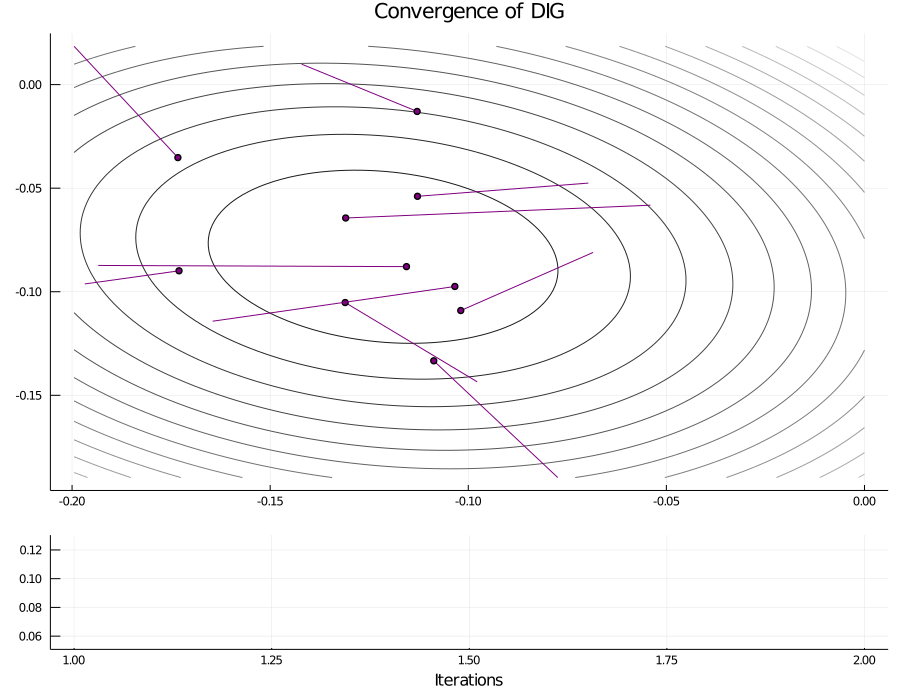

In [14]:
lims_dig = get_xhist_limits(xhist_dig)

@gif for t in 2:size(xhist_dig[1], 2)
    l = @layout [a{0.8h}; b{0.2h}]
    p = plot(layout=l, legend=false, size=(900, 700))

    plot_cost_contour!(p[1], prob, lims_dig, 100)
    plot_xhist!(p[1], xhist_dig, :purple; until=t)
    plot_bounded_errors!(p[2], error_dig, :purple, "DIG"; until=t-1)
    xaxis!(p[2], "Iterations")
    title!(p[1], "Convergence of DIG")
end